In [133]:
# https://www.kaggle.com/competitions/store-sales-time-series-forecasting

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [135]:
target_column='sales'

train_df = pd.read_csv('data/train.csv.zip')
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [136]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [137]:
transaction_df = pd.read_csv('data/transactions.csv.zip')
transaction_df

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [138]:
train_df.groupby(['date', 'store_nbr'])['sales'].sum()

date        store_nbr
2013-01-01  1                0.000000
            2                0.000000
            3                0.000000
            4                0.000000
            5                0.000000
                             ...     
2017-08-15  50           16879.121004
            51           20154.559000
            52           18600.046000
            53            8208.189000
            54           12666.858000
Name: sales, Length: 90936, dtype: float64

In [139]:
daily_sales_store_1 =train_df[(train_df['store_nbr']==1)].groupby(['date'])['sales'].sum()

In [140]:

daily_sales_store_1.index # dtype object

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
       '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14', '2017-08-15'],
      dtype='object', name='date', length=1684)

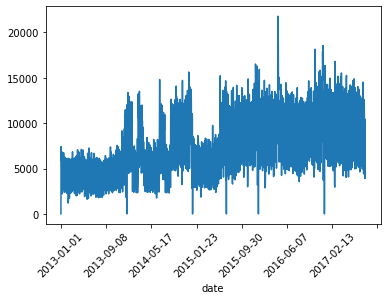

In [141]:
# Plot sales accross time
ax=daily_sales_store_1.plot(rot=45)

In [142]:
train_df.groupby(['date', 'store_nbr'])['sales'].sum().reset_index()

,date,store_nbr,sales
0,2013-01-01,1,0.000000
1,2013-01-01,2,0.000000
2,2013-01-01,3,0.000000
3,2013-01-01,4,0.000000
4,2013-01-01,5,0.000000
...,...,...,...
90931,2017-08-15,50,16879.121004
90932,2017-08-15,51,20154.559000
90933,2017-08-15,52,18600.046000
90934,2017-08-15,53,8208.189000


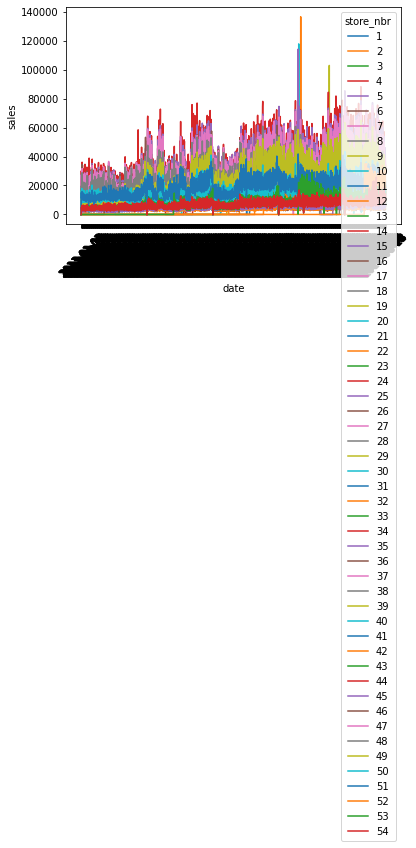

In [143]:
sns.lineplot(data=train_df.groupby(['date', 'store_nbr'])['sales'].sum().reset_index(),
             x='date',
             y='sales',
             palette="tab10",
             hue='store_nbr'
             )
plt.xticks(rotation=45);

<AxesSubplot: xlabel='date'>

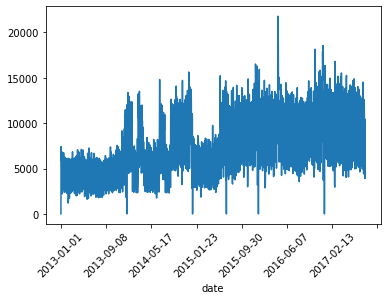

In [144]:
# perform linear regression on time
# https://www.statsmodels.org/devel/generated/statsmodels.tsa.deterministic.DeterministicProcess.html
daily_sales_store_1.plot(rot=45)

In [145]:
daily_sales_store_1.tail()

date
2017-08-11     5403.742021
2017-08-12     7543.623000
2017-08-13     3902.782000
2017-08-14    10433.314000
2017-08-15     9823.551018
Name: sales, dtype: float64

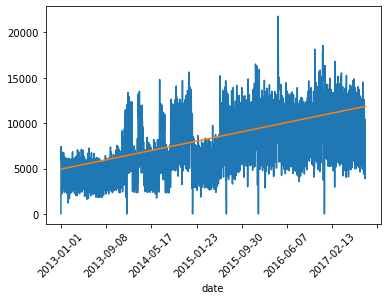

In [146]:
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

daily_sales_store_1 =train_df[(train_df['store_nbr']==1)].groupby(['date'])['sales'].sum()

dp=DeterministicProcess(index=daily_sales_store_1.index, order=1)
X=dp.in_sample()
y=daily_sales_store_1
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

daily_sales_store_1.plot(rot=45)
plt.plot(y_pred)

In [147]:
from sklearn.metrics import mean_squared_log_error

In [148]:
mean_squared_log_error(y_true=daily_sales_store_1, y_pred=y_pred ,squared=False)

0.6662495263814233

In [149]:
dp.out_of_sample(10)

/home/arawn/.local/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,trend
1685,1685.0
1686,1686.0
1687,1687.0
1688,1688.0
1689,1689.0
1690,1690.0
1691,1691.0
1692,1692.0
1693,1693.0
1694,1694.0


In [150]:
# perform linear regression on features
stores_df = pd.read_csv('data/stores.csv')
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [151]:
stores_df=stores_df.set_index('store_nbr')
stores_df.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [152]:
stores_df.loc[1]

city           Quito
state      Pichincha
type               D
cluster           13
Name: 1, dtype: object

In [153]:
stores_df.iloc[1]

city           Quito
state      Pichincha
type               D
cluster           13
Name: 2, dtype: object

In [154]:
daily_sales = train_df.groupby(['date', 'store_nbr'])['sales'].sum()
daily_sales=daily_sales.reset_index()
daily_sales.head()

,date,store_nbr,sales
0,2013-01-01,1,0.0
1,2013-01-01,2,0.0
2,2013-01-01,3,0.0
3,2013-01-01,4,0.0
4,2013-01-01,5,0.0


In [155]:
extended_train_df =daily_sales.join(stores_df, on='store_nbr')
extended_train_df.head()

,date,store_nbr,sales,city,state,type,cluster
0,2013-01-01,1,0.0,Quito,Pichincha,D,13
1,2013-01-01,2,0.0,Quito,Pichincha,D,13
2,2013-01-01,3,0.0,Quito,Pichincha,D,8
3,2013-01-01,4,0.0,Quito,Pichincha,D,9
4,2013-01-01,5,0.0,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [156]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
transformed = ohe.fit_transform(extended_train_df[['city', 'state', 'type', 'cluster']])
transformed_df = pd.DataFrame(transformed, columns=ohe.get_feature_names_out())
transformed_df.head()

,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


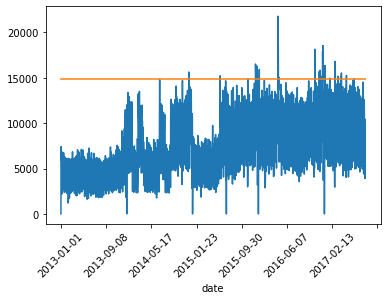

In [157]:
model_feature = LinearRegression()
model_feature.fit(transformed_df,daily_sales[target_column])

y_pred=model_feature.predict(transformed_df)

daily_sales_store_1.plot(rot=45)
plt.plot(y_pred[extended_train_df['store_nbr']==1])

In [158]:
# look at lag 1 in linear regression
daily_sales_store_1=daily_sales[daily_sales['store_nbr']==1]
daily_sales_store_1['sales_lag_1']=daily_sales_store_1['sales'].shift(1)
daily_sales_store_1

<ipython-input-158-1c08d57c58a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1['sales_lag_1']=daily_sales_store_1['sales'].shift(1)


,date,store_nbr,sales,sales_lag_1
0,2013-01-01,1,0.000000,NaN
54,2013-01-02,1,7417.148000,0.000000
108,2013-01-03,1,5873.244001,7417.148000
162,2013-01-04,1,5919.879001,5873.244001
216,2013-01-05,1,6318.785010,5919.879001
...,...,...,...,...
90666,2017-08-11,1,5403.742021,10834.579000
90720,2017-08-12,1,7543.623000,5403.742021
90774,2017-08-13,1,3902.782000,7543.623000
90828,2017-08-14,1,10433.314000,3902.782000


lag 1
correlation 0.4825820204068515


<ipython-input-159-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


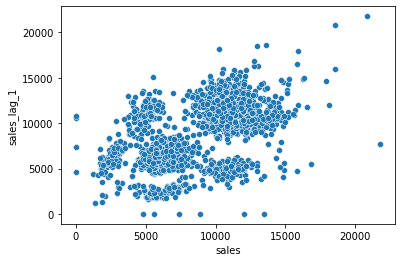

lag 2
correlation 0.4553253238666628


<ipython-input-159-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


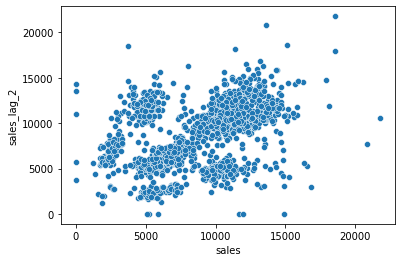

<ipython-input-159-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


lag 3
correlation 0.3585807660924557


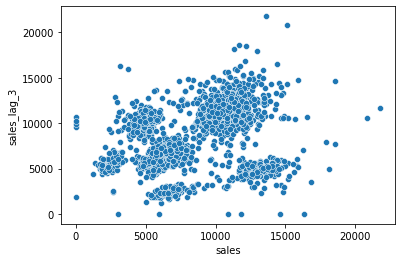

<ipython-input-159-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


lag 7
correlation 0.7920310387861091


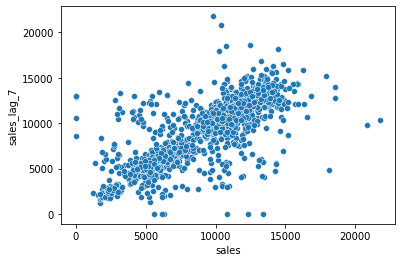

lag 15
correlation 0.37527846188160435


<ipython-input-159-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


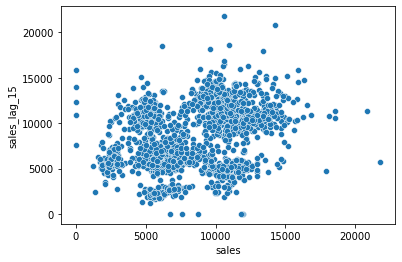

<ipython-input-159-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


lag 365
correlation 0.2372037370075466


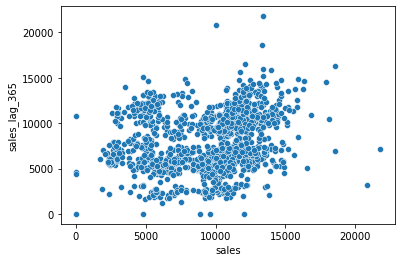

In [159]:
for lag_value in [1,2, 3,  7, 15, 365]:
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)
  sns.scatterplot(data=daily_sales_store_1, x='sales', y=f'sales_lag_{lag_value}')
  print('lag', lag_value)
  correlation = daily_sales_store_1[['sales', f'sales_lag_{lag_value}']].corr().loc['sales', f'sales_lag_{lag_value}']
  print('correlation', correlation)
  plt.show()


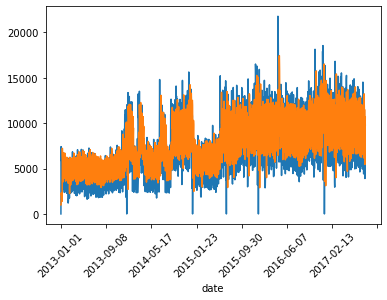

In [160]:
# Lag 1 lag 7
daily_sales_store_1[['sales', 'sales_lag_1', 'sales_lag_7']]

model = LinearRegression()
X_lag= daily_sales_store_1[['sales_lag_1', 'sales_lag_7']].fillna(0)
model.fit(X_lag, y=daily_sales_store_1['sales'])
y_pred = model.predict(X_lag)

daily_sales_store_1.set_index('date')['sales'].plot(rot=45)
plt.plot(y_pred)

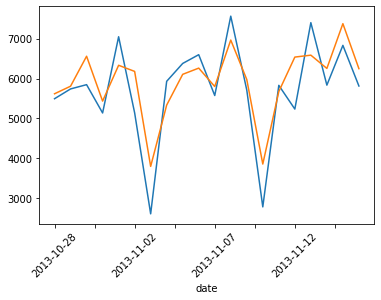

In [161]:
daily_sales_store_1.set_index('date')['sales'].iloc[300:320].plot(rot=45)
plt.plot(y_pred[300:320])

<AxesSubplot: >

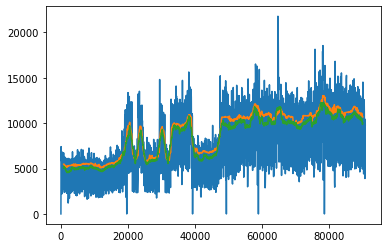

In [162]:
# plot moving average
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

daily_sales_store_1['sales'].plot(rot=45)
daily_sales_store_1['sales'].rolling(window=30, center=True).median().plot()
daily_sales_store_1['sales'].rolling(window=30, center=True).mean().plot()

# Useful to extract to new features

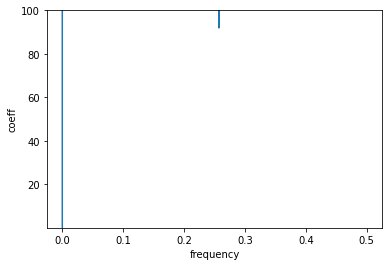

In [163]:
# find seasonality
# Plot monthly, biweekly sales distribution
# Plot Periodogram

import scipy
f, Pxx_den=scipy.signal.periodogram(daily_sales_store_1['sales'])

plt.plot(f, Pxx_den)

plt.ylim([1e-7, 1e2])

plt.xlabel('frequency')

plt.ylabel('coeff')

plt.show()

In [164]:
# Perform ARIMA analysis

In [165]:
# import statsmodels
# statsmodels.tsa.x13.x13_arima_select_order(daily_sales_store_1['sales'])

In [166]:
# statsmodels.__version__

In [167]:
# statsmodel.t

In [168]:
# y = y_feature * (y_seasonality + y_trend + y_holiday + epsilon)

In [169]:
stores_df

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
7,Quito,Pichincha,D,8
8,Quito,Pichincha,D,8
9,Quito,Pichincha,B,6


In [170]:
stores_feature =pd.DataFrame(ohe.transform(stores_df), columns=ohe.get_feature_names_out())
stores_feature

,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [171]:
daily_store_pred = pd.Series(model_feature.predict(stores_feature), name='y_pred_feature', index=stores_df.index)
daily_store_pred

store_nbr
1     14872.0
2     14872.0
3     21616.0
4     12824.0
5      7528.0
6     14872.0
7     21616.0
8     21616.0
9     11728.0
10     5744.0
11    16312.0
12     6368.0
13     6368.0
14     7008.0
15     6704.0
16     5904.0
17    10800.0
18     7840.0
19     7056.0
20    11728.0
21     7936.0
22     2432.0
23     5488.0
24    14104.0
25     6704.0
26     4568.0
27    11568.0
28     8408.0
29     8408.0
30     5264.0
31    10352.0
32     5264.0
33     8544.0
34     7296.0
35     4704.0
36     9104.0
37     8416.0
38    11512.0
39    11672.0
40     8816.0
41    10448.0
42     8416.0
43     9056.0
44    37104.0
45    25432.0
46    25312.0
47    25312.0
48    25312.0
49    25432.0
50    17984.0
51    19456.0
52     9504.0
53    -1056.0
54     6128.0
Name: y_pred_feature, dtype: float64

In [172]:
daily_sales['sales'].mean()

11806.59972071642

In [173]:
daily_store_pred.loc[53]=daily_sales['sales'].mean()

In [174]:
daily_sales['sales_features']=daily_sales['store_nbr'].map(daily_store_pred)
daily_sales['sales_normalized']=daily_sales['sales']/daily_sales['store_nbr'].map(daily_store_pred)
daily_sales

,date,store_nbr,sales,sales_features,sales_normalized
0,2013-01-01,1,0.000000,14872.000000,0.000000
1,2013-01-01,2,0.000000,14872.000000,0.000000
2,2013-01-01,3,0.000000,21616.000000,0.000000
3,2013-01-01,4,0.000000,12824.000000,0.000000
4,2013-01-01,5,0.000000,7528.000000,0.000000
...,...,...,...,...,...
90931,2017-08-15,50,16879.121004,17984.000000,0.938563
90932,2017-08-15,51,20154.559000,19456.000000,1.035905
90933,2017-08-15,52,18600.046000,9504.000000,1.957076
90934,2017-08-15,53,8208.189000,11806.599721,0.695220


<AxesSubplot: >

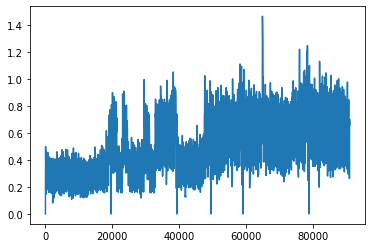

In [175]:
daily_sales[daily_sales['store_nbr']==1]['sales_normalized'].plot()

In [176]:
daily_sales['date'] = pd.to_datetime(daily_sales['date'], )

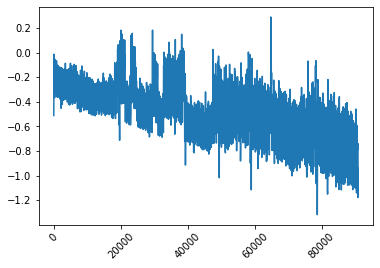

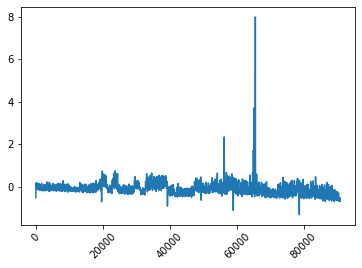

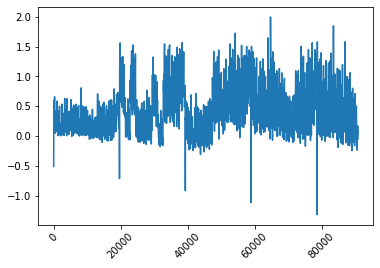

In [177]:
daily_sales['ith_days']=(daily_sales['date'] - pd.to_datetime('2013-01-01')).dt.days

model_trend = LinearRegression()

model_trend.fit(daily_sales[['ith_days']], daily_sales['sales_normalized'])

y_trend =model_trend.predict(daily_sales[['ith_days']])

daily_sales['y_trend']=y_trend
daily_sales['detrended_sales'] = daily_sales['sales_normalized']- y_trend
daily_sales[daily_sales['store_nbr']==1]['detrended_sales'].plot(rot=45)
plt.show()
daily_sales[daily_sales['store_nbr']==2]['detrended_sales'].plot(rot=45)
plt.show()
daily_sales[daily_sales['store_nbr']==3]['detrended_sales'].plot(rot=45)
plt.show()

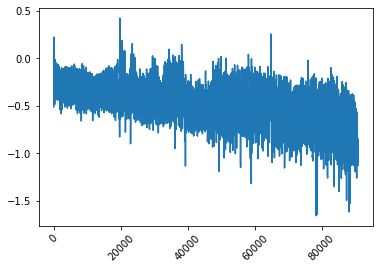

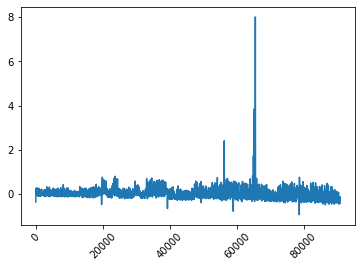

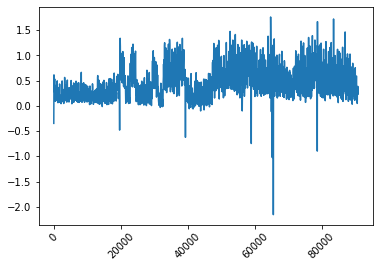

In [178]:
model_seasonality = LinearRegression()

daily_sales['detrended_sales_lag_1']= daily_sales['detrended_sales'].shift(1)
daily_sales['detrended_sales_lag_7']= daily_sales['detrended_sales'].shift(7)
model_seasonality.fit(daily_sales[['detrended_sales_lag_1', 'detrended_sales_lag_7']].fillna(0), daily_sales['detrended_sales'])

y_season=model_seasonality.predict(daily_sales[['detrended_sales_lag_1', 'detrended_sales_lag_7']].fillna(0))

daily_sales['y_season']=y_season
daily_sales['sales_unseasoned']=daily_sales['detrended_sales'] - y_season


daily_sales[daily_sales['store_nbr']==1]['sales_unseasoned'].plot(rot=45)
plt.show()
daily_sales[daily_sales['store_nbr']==2]['sales_unseasoned'].plot(rot=45)
plt.show()
daily_sales[daily_sales['store_nbr']==3]['sales_unseasoned'].plot(rot=45)
plt.show()

In [179]:
holidays_df = pd.read_csv('data/holidays_events.csv')

In [180]:
holidays_df['date']=pd.to_datetime(holidays_df['date'])

In [181]:
daily_sales['is_holiday']=daily_sales['date'].isin(holidays_df['date'])

In [182]:
model_holiday = LinearRegression()
model_holiday.fit(daily_sales[['is_holiday']], daily_sales['sales_unseasoned'])
y_pred_holiday = model_holiday.predict(daily_sales[['is_holiday']])
daily_sales['sales_holiday']=y_pred_holiday
daily_sales['epsilon']= daily_sales['sales_unseasoned'] - y_pred_holiday

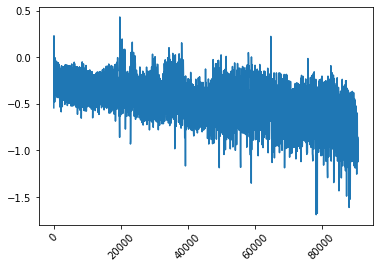

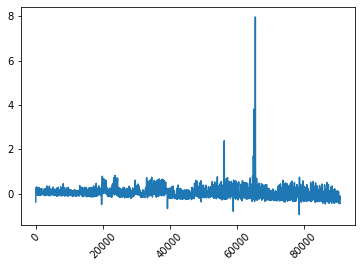

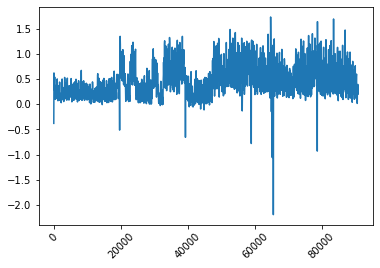

In [183]:
daily_sales[daily_sales['store_nbr']==1]['epsilon'].plot(rot=45)
plt.show()
daily_sales[daily_sales['store_nbr']==2]['epsilon'].plot(rot=45)
plt.show()
daily_sales[daily_sales['store_nbr']==3]['epsilon'].plot(rot=45)
plt.show()

In [184]:
daily_sales['pred_overall_sales']=daily_sales['sales_features']*(daily_sales['y_season']+daily_sales['y_trend']+daily_sales['sales_holiday'])

<AxesSubplot: >

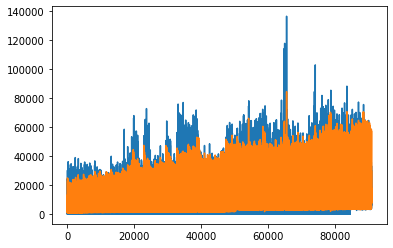

In [185]:
daily_sales['sales'].plot(rot=45)
daily_sales['pred_overall_sales'].plot()

<AxesSubplot: >

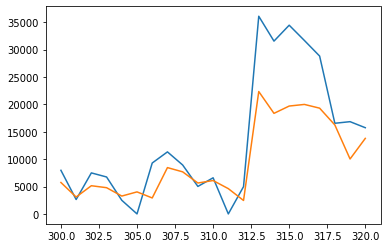

In [186]:
daily_sales['sales'].loc[300:320].plot(rot=45)
daily_sales['pred_overall_sales'].loc[300:320].plot()

In [187]:
mean_squared_log_error(y_true= daily_sales['sales'],y_pred=daily_sales['pred_overall_sales'], squared=False)

2.4650896378887532